# Aprendizagem de máquina 

In [222]:
from datetime import date
#@title Um breve estudo sobre o banco: *drug_consumption*
#@markdown ---
#@markdown #### Autores
Discente_1 = 'Manuel Ferreira Junior- 20180008601' #@param {type:"string"}
Discente_2 = 'Caroline Assis de Oliveira - 20180011385' #@param {type: "string"}
#@markdown ---
Data = '2021-11-22' #@param {type:"date"}
#@markdown ---

# Imports

In [265]:
# basics
import os 
import time
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# utils
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics and selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report,adjusted_rand_score

# Lendo base dados

In [224]:
DIR, FILE = 'data', 'drug.data'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data'
url_data = os.path.join(DIR,FILE)
r = requests.get(url, allow_redirects=True)
if not os.path.exists(DIR):
  os.makedirs(DIR)
open(url_data, 'wb').write(r.content)

346695

In [225]:
data = pd.read_csv(url_data, header=None)
data.columns = ['id', 'age', 'gender', 'education', 'country', 'ethnicity',
                'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulssive',
                'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis',
                'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh',
                'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
data.set_index('id', drop=True, inplace=True)
data.drop(["ethnicity"],axis=1, inplace = True)
data.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [226]:
data.shape

(1885, 30)

In [227]:
c = data.columns
for i in c:
  LE = LabelEncoder()
  data[i] = LE.fit_transform(data[i]) # transformando as strings em valores numerico
data.head()

,age,gender,education,country,nscore,escore,oscore,ascore,cscore,impulssive,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
id,,,,,,,,,,,,,,,,,,,,,
1,2,1,5,6,27,19,16,17,24,3,...,0,0,0,0,0,0,0,2,0,0
2,1,0,8,6,17,35,29,28,23,2,...,4,0,2,0,2,3,0,4,0,0
3,2,0,5,6,19,28,14,12,16,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,7,6,22,17,20,27,28,1,...,0,0,2,0,0,0,0,2,0,0
5,2,1,8,6,31,11,17,21,32,3,...,1,0,0,1,0,0,2,2,0,0


# Analise descritiva

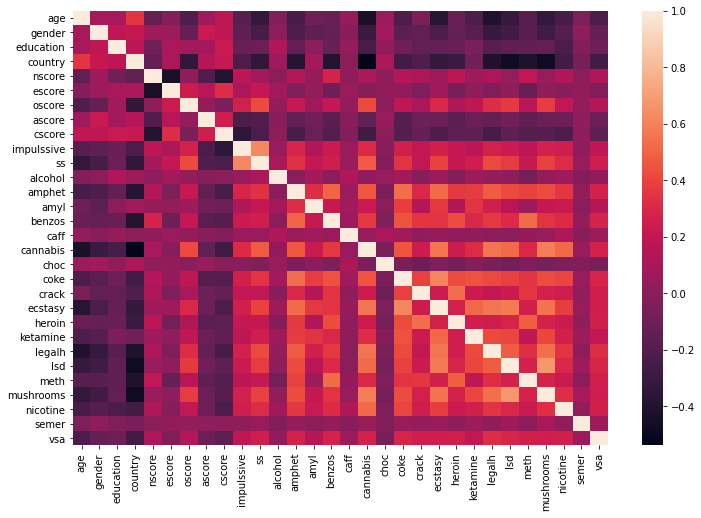

In [228]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())
plt.show()

In [229]:
y_name = 'gender'
data[y_name].value_counts()
# 0: masculino
# 1: feminino

0    943
1    942
Name: gender, dtype: int64

# Visualização de dados

In [230]:
data_drugs = data[data.columns[11:29]]
data_drugs[y_name] = data[y_name]

<ipython-input-230-f82f016053e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drugs[y_name] = data[y_name]


In [231]:
data_drugs.sum().sort_values(ascending=False)

caff         10337
choc          9626
alcohol       8737
nicotine      6033
cannabis      5635
benzos        2762
legalh        2556
amphet        2527
ecstasy       2477
mushrooms     2238
coke          2189
lsd           2001
meth          1558
amyl          1144
ketamine      1073
gender         942
heroin         705
crack          561
semer           18
dtype: int64

In [248]:
data_str = data.copy()
for  c in data.iloc[:,11:30].columns:
    data_str[c][data_str[c] > 0] = 1

In [249]:
data_str.columns

Index(['age', 'gender', 'education', 'country', 'nscore', 'escore', 'oscore',
       'ascore', 'cscore', 'impulssive', 'ss', 'alcohol', 'amphet', 'amyl',
       'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',
       'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine',
       'semer', 'vsa'],
      dtype='object')

In [250]:
df = data_str.groupby(['gender', 'education']).sum().iloc[:,11:29][['caff', 'choc', 'cannabis', 'ecstasy', 'meth', 'lsd']]
df

caff  choc  cannabis  ecstasy  meth  lsd
gender education                                          
0      0            15    16        13        8     6    9
       1            54    56        46       27    14   28
       2            16    16        16       11     4   13
       3            62    61        60       46    29   38
       4           335   331       325      232   142  221
       5           134   132       110       63    32   67
       6           182   183       149       89    50   97
       7           104   102        84       43    11   38
       8            31    31        23       17    15   17
1      0            11    12         9        7     5    7
       1            42    42        19        9     6    7
       2            13    14         9        7     4    3
       3            37    36        26       11    10   10
       4           169   171       148       89    49   77
       5           132   131        78       37    21   38
       6           288   290       198      106    35   91
       7           176   173       118       43    17   42
       8            57    56        41       19     6   13

<Figure size 864x576 with 0 Axes>

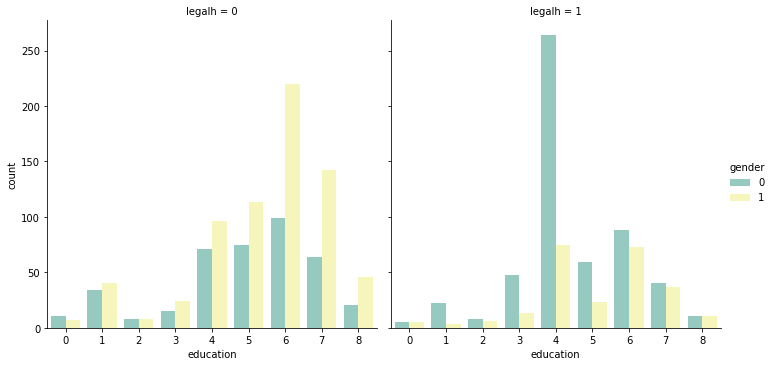

In [258]:
plt.figure(figsize=(12,8))
#sns.barplot(data=data_str, x='education', y='heroin', palette='Set3')
sns.catplot(data=data_str,kind="count",
            x='education',hue='gender',
            col = 'legalh',#'meth',#'lsd',#'legalh', #vsa, nicotine
            palette='Set3')
plt.show()

## Teste de wilcoxon

In [210]:
gp0 = data_str[data_str.gender == 0].groupby(['education'],axis=0).sum().iloc[:,11:29]
gp1 = data_str[data_str.gender == 1].groupby(['education'],axis=0).sum().iloc[:,11:29]

gp0 - gp1

,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
education,,,,,,,,,,,,,,,,,,
0,0,2,1,4,4,4,0,-1,1,-2,2,0,2,1,5,3,0,-2
1,24,13,10,12,27,14,22,3,18,8,10,19,21,8,18,17,-1,13
2,6,5,2,3,7,2,7,3,4,3,1,2,10,0,8,5,-1,4
3,31,14,20,25,34,25,19,14,35,11,22,35,28,19,27,31,1,45
4,137,64,104,166,177,160,112,49,143,50,76,189,144,93,156,165,1,162
5,24,29,10,2,32,1,20,3,26,11,22,36,29,11,30,16,0,13
6,1,1,-10,-106,-49,-107,-12,8,-17,7,9,15,6,15,0,-61,-2,4
7,-1,-6,-13,-72,-34,-71,-11,-5,0,-5,-2,3,-4,-6,-6,-37,0,9
8,-7,0,-3,-26,-18,-25,-2,2,-2,3,3,0,4,9,-3,-16,0,-3


In [219]:
pvalues = {}
for name in gp0.columns:
    pvalues[name] = round(wilcoxon(gp0[name] - gp1[name])[1], 4)
    
df_pvalues = pd.DataFrame(pvalues.values(), index=pvalues.keys(), columns=['p-value'])
df_pvalues.sort_values('p-value',ascending=True)

,p-value
legalh,0.0180
vsa,0.0195
lsd,0.0195
ketamine,0.0195
meth,0.0251
heroin,0.0391
amyl,0.0499
mushrooms,0.0499
crack,0.0742
amphet,0.0793


# Split  dos dados

In [67]:
X = data.drop([y_name],axis=1)
Y = pd.DataFrame(data[y_name])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Modelagem

## Classificação

### Decision Tree Classifier

In [159]:
param_grid_dtc = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [100,200,300,400,500,600],
    'min_samples_leaf': [5,50,100,200,300,500]
}

In [160]:
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, param_grid_dtc, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [161]:
dtc = DecisionTreeClassifier(**clf.best_params_)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=200)

In [162]:
features_importances = pd.DataFrame(dtc.feature_importances_,
columns=['importances'],
index=data.drop(y_name,axis=1).columns)
# Ranking top 5 variáveis mais influentes sobre a árvore de decisão
features_importances.sort_values('importances', ascending=False).head()

,importances
legalh,0.596365
ascore,0.178105
education,0.159454
ss,0.053294
nscore,0.012782


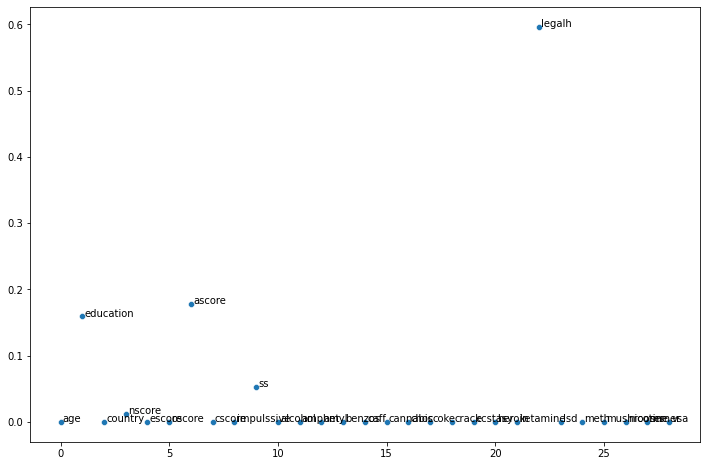

In [163]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]))

In [164]:
confusion_matrix(y_test, y_pred)

array([[131,  43],
       [ 92, 111]])

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.75      0.66       174
           1       0.72      0.55      0.62       203

    accuracy                           0.64       377
   macro avg       0.65      0.65      0.64       377
weighted avg       0.66      0.64      0.64       377



#### Validação cruzada

In [166]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

for train_index, test_index in tqdm(skf.split(X, Y)):
    X_air_train, X_air_test = X.values[train_index], X.values[test_index]
    y_air_train, y_air_test = Y.values[train_index], Y.values[test_index]
    model = DecisionTreeClassifier(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

5it [00:00, 255.67it/s]

[[ 30 158]
 [ 14 175]]
[[143  45]
 [ 85 104]]
[[165  24]
 [120  68]]
[[172  17]
 [ 97  91]]
[[111  78]
 [ 47 141]]
Acc: 0.6366 | Std: 0.053
Recall [0]: 0.6581 | Recall [1]: 0.6144
Precision [0]: 0.646 | Precision [1]: 0.6898
0.04932832717895508


### Random Forest

In [98]:
param_grid_rfc = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [100,200,300,400],
    'min_samples_leaf': [5,50,100,200,300],
    'n_estimators': [100,300,500]
}

In [99]:
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, param_grid_rfc, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConvers

In [100]:
rfc = RandomForestClassifier(**clf.best_params_)
rfc.fit(X_train, y_train)

<ipython-input-100-95c49dcae11f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=400, min_samples_leaf=5, n_estimators=300)

In [101]:
features_importances = pd.DataFrame(rfc.feature_importances_,
columns=['importances'],
index=data.drop(y_name,axis=1).columns)
# Ranking top 5 variáveis mais influentes sobre a árvore de decisão
features_importances.sort_values('importances', ascending=False).head()

,importances
ascore,0.092832
nscore,0.075731
legalh,0.075376
cannabis,0.066875
ss,0.061090


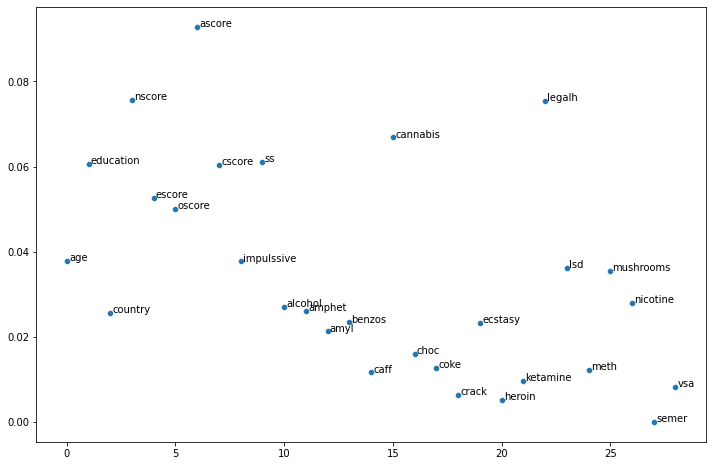

In [102]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]))

In [103]:
confusion_matrix(y_test, y_pred)

array([[117,  57],
       [ 67, 136]])

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       174
           1       0.70      0.67      0.69       203

    accuracy                           0.67       377
   macro avg       0.67      0.67      0.67       377
weighted avg       0.67      0.67      0.67       377



#### Validação cruzada

In [106]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

for train_index, test_index in tqdm(skf.split(X, Y)):
    X_air_train, X_air_test = X.values[train_index], X.values[test_index]
    y_air_train, y_air_test = Y.values[train_index], Y.values[test_index]
    model = RandomForestClassifier(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

0it [00:00, ?it/s]<ipython-input-106-c76e47611270>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_air_train, y_air_train)
1it [00:00,  1.57it/s]

[[ 41 147]
 [  7 182]]


<ipython-input-106-c76e47611270>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_air_train, y_air_train)
2it [00:01,  1.52it/s]

[[136  52]
 [ 59 130]]


<ipython-input-106-c76e47611270>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_air_train, y_air_train)
3it [00:02,  1.52it/s]

[[171  18]
 [118  70]]


<ipython-input-106-c76e47611270>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_air_train, y_air_train)
4it [00:02,  1.54it/s]

[[170  19]
 [ 76 112]]


<ipython-input-106-c76e47611270>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_air_train, y_air_train)
5it [00:03,  1.50it/s]

[[134  55]
 [ 54 134]]
Acc: 0.679 | Std: 0.05607
Recall [0]: 0.6909 | Recall [1]: 0.6663
Precision [0]: 0.7094 | Precision [1]: 0.7254
3.332651138305664


### Regressão Logistica

In [167]:
param_grid_rl = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [168]:
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid_rl, cv=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

In [169]:
lr = LogisticRegression(**clf.best_params_)
lr.fit(X_train, y_train)

/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01)

In [170]:
features_importances = pd.DataFrame(np.abs(lr.coef_[0])/np.sum(np.abs(lr.coef_[0])),
columns=['importances'],
index=data.drop(y_name,axis=1).columns)
# Ranking top 5 variáveis mais influentes sobre a árvore de decisão
features_importances.sort_values('importances', ascending=False).head()

,importances
legalh,0.116630
amyl,0.109501
education,0.082477
lsd,0.066099
ss,0.064555


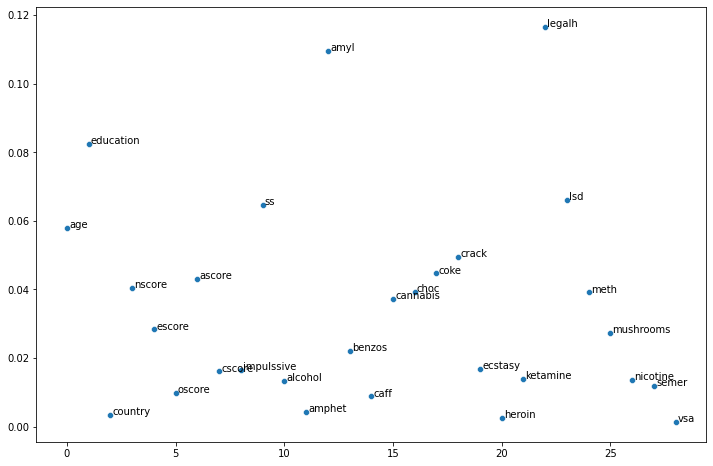

In [171]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(features_importances.shape[0]),
                y=features_importances.values.reshape((1,-1))[0])
for i in range(features_importances.shape[0]):
    plt.text(x = i + 0.1,
            y = features_importances.values[i],
            s='{}'.format(features_importances.index[i]))

In [172]:
confusion_matrix(y_test, y_pred)

array([[115,  59],
       [ 56, 147]])

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       174
           1       0.71      0.72      0.72       203

    accuracy                           0.69       377
   macro avg       0.69      0.69      0.69       377
weighted avg       0.69      0.69      0.69       377



In [261]:
start = time.time()

accuracies = []
precision_0, precision_1 = [], []
recall_0, recall_1 = [], []
K = 5
skf = StratifiedKFold(n_splits=K)

for train_index, test_index in tqdm(skf.split(X, Y)):
    X_air_train, X_air_test = X.values[train_index], X.values[test_index]
    y_air_train, y_air_test = Y.values[train_index], Y.values[test_index]
    model = LogisticRegression(**clf.best_params_)
    model.fit(X_air_train, y_air_train)
    y_air_pred = model.predict(X_air_test)
    #acc = accuracy_score(y_air_test, y_air_pred)
    #accuracies.append(acc)
    cm = confusion_matrix(y_air_test, y_air_pred)
    print(cm)
    # Acuracia
    acc = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
    accuracies.append(acc)
    # Precisão por classe
    prec_0 = cm[0,0]/(cm[0,0] + cm[1,0])
    prec_1 = cm[1,1]/(cm[1,1] + cm[0,1])
    precision_0.append(prec_0), precision_1.append(prec_1)
    # Recall por classe
    rec_0 = cm[0,0]/(cm[0,0] + cm[0,1])
    rec_1 = cm[1,1]/(cm[1,1] + cm[1,0])
    recall_0.append(rec_0), recall_1.append(rec_1)

print('Acc: {0:.4} | Std: {1:.4}'.format(np.mean(accuracies), np.std(accuracies)))
print('Recall [0]: {0:.4} | Recall [1]: {1:.4}'.format(np.mean(recall_0), np.mean(recall_1)))
print('Precision [0]: {0:.4} | Precision [1]: {1:.4}'.format(np.mean(precision_0), np.mean(precision_1)))

end = time.time()
print(end - start)

0it [00:00, ?it/s]/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

[[ 58 130]
 [ 14 175]]
[[129  59]
 [ 45 144]]


/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
3it [00:00,  7.75it/s]/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

[[166  23]
 [ 92  96]]
[[151  38]
 [ 69 119]]


/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/manuel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
5it [00:00,  7.05it/s]

[[131  58]
 [ 50 138]]
Acc: 0.6934 | Std: 0.03886
Recall [0]: 0.673 | Recall [1]: 0.7131
Precision [0]: 0.7201 | Precision [1]: 0.7104
0.716519832611084


## Agrupamento

Perceba que ao aplicarmos um PCA, vemos que as classes estão sendo sobrepostas, dificultando basten a tarefa de agrupamento, logo sendo inviavel utiliza-la para este problema.

/home/manuel/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


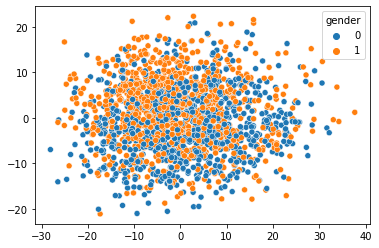

In [294]:
pca = PCA(2)
x = pca.fit_transform(data.drop([y_name],axis=1))
sns.scatterplot(x[:,0],x[:,1],hue=data[y_name])
plt.show()

In [264]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [292]:
K = 1000
rand = []
for train_index, test_index in tqdm(skf.split(X, Y)):
    X_air_train, X_air_test = X.values[train_index], X.values[test_index]
    y_air_train, y_air_test = Y.values[train_index], Y.values[test_index]
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X_air_train)
    y_pred = kmeans.predict(X_air_test)
    rand.append(adjusted_rand_score(y_air_test.T[0], y_pred))

5it [00:01,  2.93it/s]


In [293]:
np.mean(rand)

0.01520309445428349